# Starwars
## 1. Look around the data

In [39]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale = 1)

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [40]:
sw = pd.read_csv('Starwars.csv')

In [41]:
sw.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [42]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [43]:
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [44]:
sw.describe(include = object)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [45]:
print('Hair colour: ', sw['hair_color'].unique())
print('Skin colour: ', sw['skin_color'].unique())
print('Eye colour: ', sw['eye_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())

Hair colour:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin colour:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye colour:  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Mala

In [109]:
print("The total number of data: ", sw.shape[0]*sw.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the toal "
      .format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))
print("The number of people in Starwars: ", sw['name'].nunique())
print("The number of species in Starwars: ", sw['species'].nunique())

The total number of data:  957
The total number of null values: 71 and it occupies 7.42% of the toal 
The number of people in Starwars:  87
The number of species in Starwars:  37


## 2.Questions
### *What is the ratio of 'Gender'  and 'Sex' in Starwars
### *How is the distribution of 'Height' according to gender & sex in Starwars
### *Who is the most heavist character and who is the most  lightest character?
### *Does have correlation with 'Height' and 'Mass' in Starwars?


## 3. Data Preprocessing

### 3-1. Null values

In [47]:
sw.isnull().any(axis=0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [48]:
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [49]:
sw['height'].fillna(0, inplace = True)
sw['mass'].fillna(0, inplace = True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [50]:
# Nan & none exists in sw.['sex'] column.
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [51]:
#sex = none >> species = Droid, hence I changed the column
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


C:\Users\hyung\AppData\Local\Temp\ipykernel_10496\150059989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['sex'][(sw['sex'] == 'none')] = 'robot'


## 4. EDA & Visualization

### 4-1.What is the ratio of  'Gender' in Starwars

In [52]:
# The ratio of 'Gender' and 'Sex' in Starwars
sw['sex'].value_counts()


male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

In [53]:
sw['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

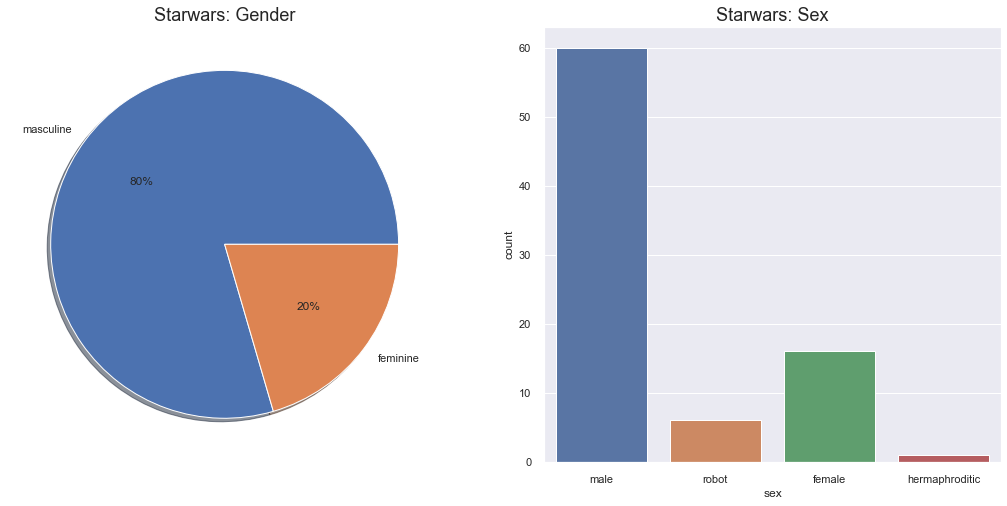

In [68]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True)
ax[0].set_title('Starwars: Gender', size=18)
ax[0].set_ylabel('')

sns.countplot(x='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18)


plt.show()

### 4-2. The distribution of characters' height in Starwars according to 'sex' & 'gender'.

In [69]:
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [72]:
#skewness and kurtosis
# In case of normal distribution, it should be -3 < skewness < 3.
# In case of normal distribution, kurtosis = 0.
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.760878
Kurtosis: 2.927697


In [75]:
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


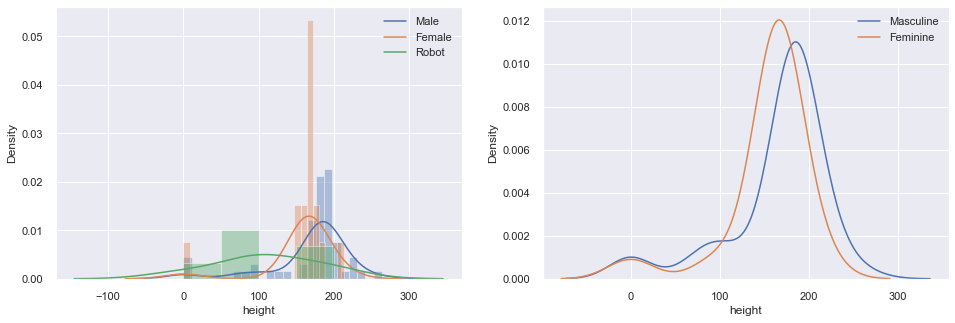

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['Male', 'Female', 'Robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['Masculine', 'Feminine'])

plt.show()

### 4-3. Who is the most heavist character and who is the most  lightest character?

In [85]:
notz = sw[sw['mass'] != 0]
min(notz['mass'])

15.0

In [89]:
print("The mass of {} is the most lightest as {} ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("The mass of {} is the most heavist as {} ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

The mass of ['Ratts Tyerell'] is the most lightest as 15.0 
The mass of ['Jabba Desilijic Tiure'] is the most heavist as 1358.0 


### 4-4. The comparison of mass between species of Starwars characters.

In [92]:
# The average weight of species.
weight = sw[['species', 'mass']].groupby(['species'], as_index = True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


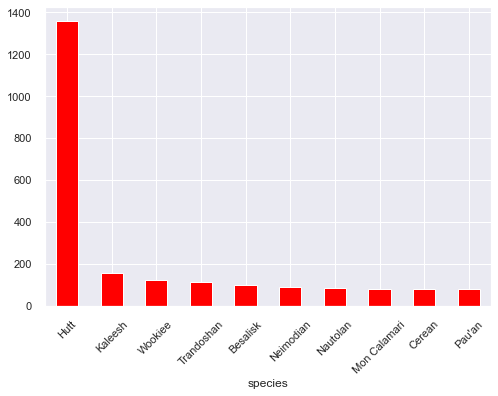

In [95]:
# TOP10 Species by mass.
weight['mass'].sort_values(ascending = False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

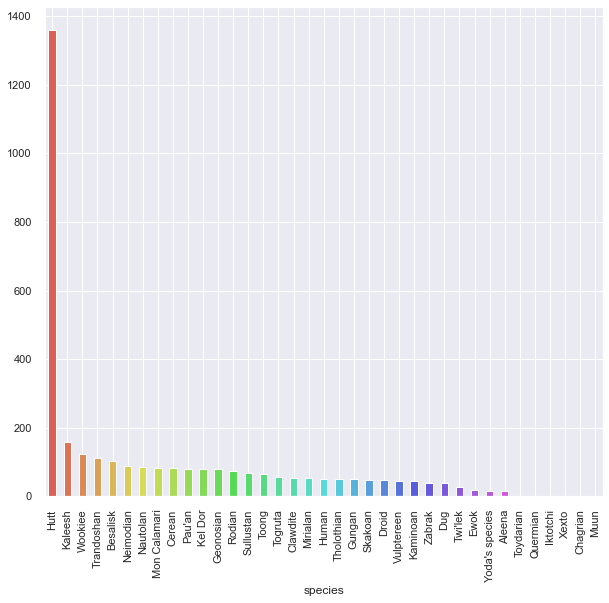

In [98]:
f, ax = plt.subplots(1,1, figsize=(10,9))

colors = sns.color_palette('hls',len(weight['mass']))
g = weight['mass'].sort_values(ascending=False).plot.bar(color=colors)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

### 4-5. The correlation with mass and height of characters in Starwars

In [101]:
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin(['0'])
sw[~out1][~out2].shape

C:\Users\hyung\AppData\Local\Temp\ipykernel_10496\2630734259.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  swcorr = sw[~out1][~out2].shape


C:\Users\hyung\AppData\Local\Temp\ipykernel_10496\3184772263.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(data=sw[~out1][~out2], x='height', y ='mass', hue='gender')


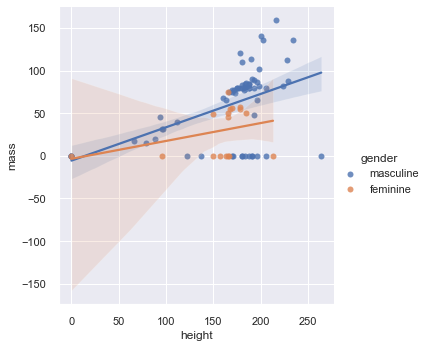

In [106]:
sns.lmplot(data=sw[~out1][~out2], x='height', y ='mass', hue='gender')
sns.set_style(style = 'darkgrid')

plt.show()

## 5.Review
### Data:
#### The total number of data:  957
#### The total number of null values: 105 = It occupies 10.97% of the toal
#### The number of people in Starwars:  87
#### The number of species in Starwars:  37


#### The ratio of characters' gender in Starwars: male/masculine occupies 80%

### The distribution of characters' height in Starwars according to 'sex' & 'gender'.
#### Men is taller than women and robot is smaller than man. 

#### The mass of ['Ratts Tyerell'] is the most lightest as 15.0 
#### The mass of ['Jabba Desilijic Tiure'] is the most heavist as 1358.0

### *Does have correlation with 'Height' and 'Mass' in Starwars?
#### Yes, height and weight are usually proportional to each other.